# Dask Bag



Collection non ordonnée avec répéition et donc sans index. Cela ne ressemble à une liste car cette dernière est indexée et ordonnée, et cela ne ressemble pas à un ensemble (set) car ce dernier n'a pas de répétition.

In [17]:
import numpy as np
import pandas as pd
import dask.bag as db

b = db.from_sequence([1, 2, 3, 4, 5, 6, 2, 1], npartitions=3)
b

dask.bag<from_sequence, npartitions=3>

In [18]:
b.compute()

[1, 2, 3, 4, 5, 6, 2, 1]

## Méthodes et apis

Les opérateur de manipulation de collections sont disponibles sur les Bag. Vous pouvez voir une docmentation visuelle de ces opérateurs sur le site de [reactiveX](https://reactivex.io/documentation/). Par exemple, voici la doc visuelle de [zip](https://reactivex.io/documentation/operators/zip.html) et de [map](https://reactivex.io/documentation/operators/map.html).

Le chaînage de ces opérateurs est possible, permettant ainsi d'exprimer plusieurs opération en une seule ligne de code.

- Filter: garde les éléments dont le résultat de la lambda est True ou différent de 0 (on dit dans le jargon que c'est un "truthy value").

In [19]:
odd_numbers = b.filter(lambda x: x % 2) # ou bien lambda x: x % 2 != 0
odd_numbers

dask.bag<filter-lambda, npartitions=3>

In [20]:
odd_numbers.compute()

[1, 3, 5, 1]

In [21]:
distinct_numbers = b.distinct()
distinct_numbers

dask.bag<distinct-aggregate, npartitions=1>

In [22]:
distinct_numbers.compute()

[1, 2, 3, 4, 5, 6]

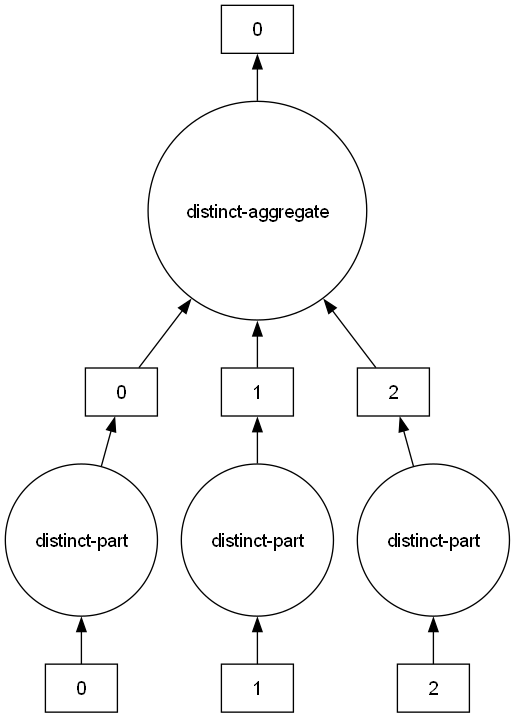

In [28]:
distinct_numbers.visualize()

In [24]:
times_ten_numbers = b.map(lambda x: x * 10)
times_ten_numbers.compute()

[10, 20, 30, 40, 50, 60, 20, 10]

In [26]:
c = db.zip(b, times_ten_numbers)
c

dask.bag<zip, npartitions=3>

In [27]:
c.compute()

[(1, 10), (2, 20), (3, 30), (4, 40), (5, 50), (6, 60), (2, 20), (1, 10)]